In [2]:
# !pip install pandas
import pandas as pd # type: ignore
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data_description = pd.read_csv("data_descriptions.csv")
data_description

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly ba...
2,TotalCharges,Feature,float,The total charges incurred by the user over th...
3,SubscriptionType,Feature,object,The type of subscription chosen by the user (B...
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paper...
6,ContentType,Feature,string,The type of content preferred by the user (Mov...
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the s...
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV,..."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching c...


In [4]:
x_train = pd.read_csv("train.csv")
x_train.head(5)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [5]:
y_test = pd.read_csv("test.csv")
y_test.head(5)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


### Analyzing the Data 

Before we make inferences and predictions, it is good idea to understand the basics of the data. Understanding the data is nothing but gaining a general insights about the data like:
* `Number of rows and columns` present in the dataframe
* what are the `data types` that the dataframe is consist?
* Is there any `Missing values`? 

    

In [6]:
# let us fing the number of rows and column
x_train.shape

(243787, 21)

The dimenstion of the dataset is (243787, 21) where 243787 represents numberr of rows ( Obsevations ) and 21 respresents columns ( Features )

In [7]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [8]:
x_train.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


In [9]:
# let us store x_train data set into dataframe df
df = x_train

In [10]:
df.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

since we do not have any missing valus in our dataset, there is no need of drpopping any colums or rows and filling the missing values 

### Univariate Analysis

We will explore each indivisual variables to understand it's distribution and potential outliers.  

num_variables = df.columns


In [11]:
variables = df.columns

In [12]:
variables

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object')

In [13]:
print(df["AccountAge"].dtype)

int64


In [14]:
for i in range(2):
    print(df[variables[i]].dtype)

int64
float64


In [15]:
num_variables = []
for i in variables:
    if df[i].dtype == "int64" and "float64":
        num_variables.append(i)

In [16]:
num_variables


['AccountAge',
 'ContentDownloadsPerMonth',
 'SupportTicketsPerMonth',
 'WatchlistSize',
 'Churn']

In [17]:
# select all data tyeps with numbers 
num_df = df.select_dtypes(include = "number")
num_df.head()


,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
0,20,11.055215,221.104302,36.758104,63.531377,10,2.176498,4,3,0
1,57,5.175208,294.986882,32.450568,25.725595,18,3.478632,8,23,0
2,73,12.106657,883.785952,7.395160,57.364061,23,4.238824,6,1,0
3,32,7.263743,232.439774,27.960389,131.537507,30,4.276013,2,24,0
4,57,16.953078,966.325422,20.083397,45.356653,20,3.616170,4,0,0


In [19]:
# similarly seperate categorocal data and store it in a dataframe 
cat_df = df.select_dtypes(include="object")
cat_df.head()

,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,GenrePreference,Gender,ParentalControl,SubtitlesEnabled,CustomerID
0,Premium,Mailed check,No,Both,No,Mobile,Sci-Fi,Male,No,No,CB6SXPNVZA
1,Basic,Credit card,Yes,Movies,No,Tablet,Action,Male,No,Yes,S7R2G87O09
2,Basic,Mailed check,Yes,Movies,No,Computer,Fantasy,Male,Yes,Yes,EASDC20BDT
3,Basic,Electronic check,No,TV Shows,No,Tablet,Drama,Male,Yes,Yes,NPF69NT69N
4,Premium,Electronic check,Yes,TV Shows,No,TV,Comedy,Female,No,No,4LGYPK7VOL


In [21]:
# let us get a list of numeracal & Categorical column name 
num_columns = num_df.columns
cat_columns = cat_df.columns
print(cat_columns)



Index(['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType',
       'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender',
       'ParentalControl', 'SubtitlesEnabled', 'CustomerID'],
      dtype='object')


In [22]:
print(num_columns)

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
       'SupportTicketsPerMonth', 'WatchlistSize', 'Churn'],
      dtype='object')


In [24]:
import matplotlib.pyplot as plt 
import seaborn as sns



<Axes: xlabel='AccountAge', ylabel='Count'>

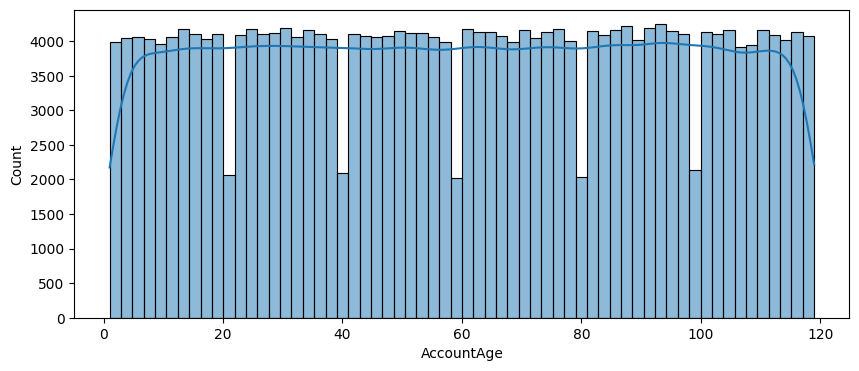

In [27]:
plt.figure(figsize=(10, 4))
sns.histplot(data= df, x = 'AccountAge', kde=True)

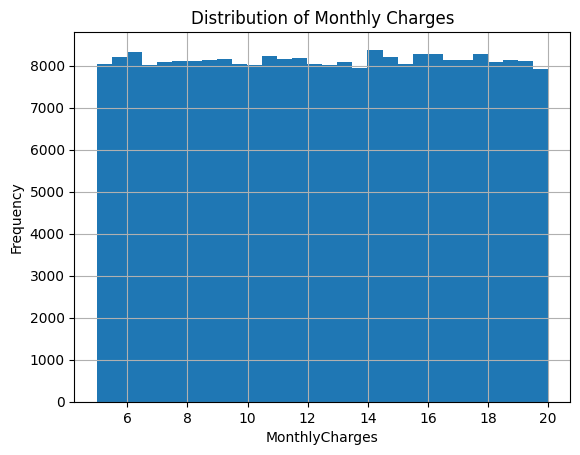

In [30]:
import matplotlib.pyplot as plt
df['MonthlyCharges'].hist(bins=30)
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges')
plt.show()


<Axes: xlabel='MonthlyCharges', ylabel='Count'>

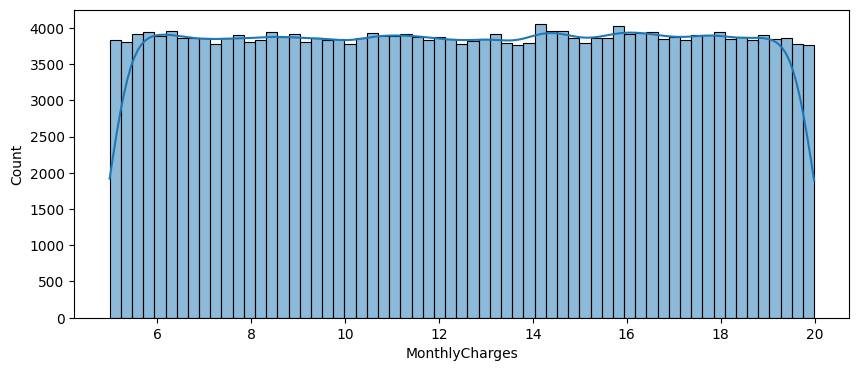

In [32]:
plt.figure(figsize=(10, 4))
sns.histplot(data= df, x = 'MonthlyCharges', kde=True)